In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('uber.csv', low_memory=False, index_col=0)

In [3]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# IQR
### IQR = Q3 -Q1
### Min = Q1 - 1.5 X IQR

In [7]:
Q1 = data['pickup_longitude'].quantile(0.25)
Q3 = data['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1

Min = Q1 - 1.5 * IQR
Max = Q3 + 1.5 * IQR

In [8]:
print('Max = ', Max)
print('Max = ', Min)

Max =  -73.92978750000003
Max =  -74.02943149999999


In [9]:
data[(data['pickup_longitude'] < Min) | (data['pickup_longitude'] > Max)].shape[0]/data.shape[0]

0.06779533897669489

# Z score

In [10]:
mu = data['pickup_longitude'].mean()
std = data['pickup_longitude'].std()

z = np.abs((data['pickup_longitude'] - mu)/std)

print(data[z>3].shape[0]/data.shape[0]*100)

data = data[z<=3]
data

1.9680098400492003


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [11]:
mu = data['pickup_latitude'].mean()
std = data['pickup_latitude'].std()

z = np.abs((data['pickup_latitude'] - mu)/std)

print(data[z>3].shape[0]/data.shape[0]*100)

data = data[z<=3]
data

0.005100401401590305


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
mu = data['dropoff_latitude'].mean()
std = data['dropoff_latitude'].std()

z = np.abs((data['dropoff_latitude'] - mu)/std)

print(data[z>3].shape[0]/data.shape[0]*100)

data = data[z<=3]
data

0.09028170953772705


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
mu = data['dropoff_longitude'].mean()
std = data['dropoff_longitude'].std()

z = np.abs((data['dropoff_longitude'] - mu)/std)

print(data[z>3].shape[0]/data.shape[0]*100)

data = data[z<=3]
data

0.010210541362903062


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195856.000000,195856.000000,195856.000000,195856.000000,195856.000000,195856.000000
mean,11.341849,-73.975161,40.750900,-73.974158,40.751159,1.684814
std,9.798578,0.060226,0.032562,0.042953,0.037221,1.387649
min,-52.000000,-89.933333,39.514527,-75.458979,37.533090,0.000000
25%,6.000000,-73.992274,40.736447,-73.991597,40.735323,1.000000
50%,8.500000,-73.982108,40.753307,-73.980536,40.753747,1.000000
75%,12.500000,-73.968355,40.767550,-73.965373,40.768335,2.000000
max,499.000000,-67.370360,42.478467,-69.046738,42.464187,208.000000


In [16]:
data.shape[0]

195856

In [17]:
from geopy.distance import geodesic

In [18]:
Distance = []

for i in range(data.shape[0]):
    start = (data.loc[i, 'pickup_latitude'], data.loc[i, 'pickup_longitude'])
    dest = (data.loc[i, 'dropoff_latitude'], data.loc[i, 'dropoff_longitude'])
    Distance.append(geodesic(start, dest).kilometers)



In [19]:
df = pd.DataFrame({'distance': Distance,
           'n_passenger': data['passenger_count'].values,
           'fare': data['fare_amount'].values})

In [20]:
df

,distance,n_passenger,fare
0,1.681111,1,7.5
1,2.454363,1,7.7
2,5.039603,1,12.9
3,1.661442,3,5.3
4,4.483730,5,16.0
...,...,...,...
195851,0.112128,1,3.0
195852,1.879635,1,7.5
195853,12.867916,2,30.9
195854,3.536552,1,14.5


In [21]:
df.describe()

,distance,n_passenger,fare
count,195856.000000,195856.000000,195856.000000
mean,3.363642,1.684814,11.341849
std,5.476088,1.387649,9.798578
min,0.000000,0.000000,-52.000000
25%,1.256185,1.000000,6.000000
50%,2.157213,1.000000,8.500000
75%,3.907804,2.000000,12.500000
max,1343.523298,208.000000,499.000000


In [22]:
df['n_passenger'].value_counts()

n_passenger
1      135533
2       28847
5       13723
3        8701
6        4184
4        4181
0         686
208         1
Name: count, dtype: int64

In [23]:
df = df[df['distance']!=0]
df = df[df['n_passenger']!=0]
df = df[df['n_passenger']<=6]
df = df[df['fare']>0]

In [24]:
df.describe()

,distance,n_passenger,fare
count,193111.000000,193111.000000,193111.000000
mean,3.400588,1.689484,11.354064
std,5.500758,1.305046,9.739827
min,0.000084,1.000000,0.010000
25%,1.281155,1.000000,6.000000
50%,2.181403,1.000000,8.500000
75%,3.940517,2.000000,12.500000
max,1343.523298,6.000000,499.000000


In [25]:
mu = df['fare'].mean()
std = df['fare'].std()

z = np.abs((df['fare'] - mu)/std)

print(df[z>3].shape[0]/df.shape[0]*100)

df = df[z<=3]
df

2.713983149587543


,distance,n_passenger,fare
0,1.681111,1,7.5
1,2.454363,1,7.7
2,5.039603,1,12.9
3,1.661442,3,5.3
4,4.483730,5,16.0
...,...,...,...
195851,0.112128,1,3.0
195852,1.879635,1,7.5
195853,12.867916,2,30.9
195854,3.536552,1,14.5


In [26]:
mu = df['distance'].mean()
std = df['distance'].std()

z = np.abs((df['distance'] - mu)/std)

print(df[z>3].shape[0]/df.shape[0]*100)

df = df[z<=3]
df

0.14424868259967


,distance,n_passenger,fare
0,1.681111,1,7.5
1,2.454363,1,7.7
2,5.039603,1,12.9
3,1.661442,3,5.3
4,4.483730,5,16.0
...,...,...,...
195851,0.112128,1,3.0
195852,1.879635,1,7.5
195853,12.867916,2,30.9
195854,3.536552,1,14.5


In [27]:
df = df[df['fare']>=0.5]

In [28]:
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='distance', ylabel='fare'>

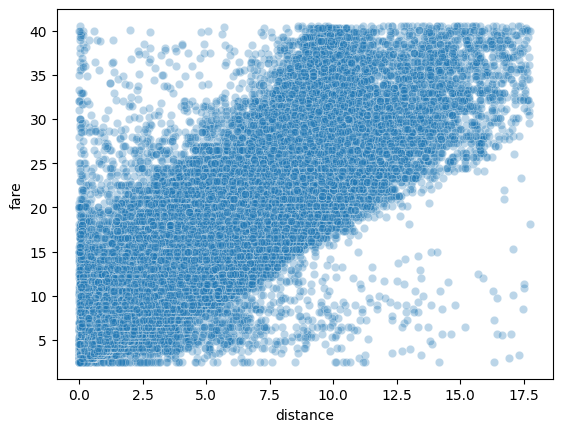

In [29]:
sns.scatterplot(x='distance', y='fare', data=df, alpha =0.3)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = np.asarray(df[['distance', 'n_passenger']])
y = np.asarray(df['fare'])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(121937, 2) (121937,)
(65659, 2) (65659,)


In [34]:
theta1 = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

In [35]:
theta1

array([2.59960749, 0.94134569])

In [36]:
xx = np.c_[np.ones((x_train.shape[0])), x_train]

In [37]:
theta2 = np.linalg.inv(xx.T @ xx) @ xx.T @y_train

In [38]:
theta2

array([3.65042447, 2.18309301, 0.04130176])

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression()

In [41]:
lr1.coef_

array([2.18309301, 0.04130176])

In [42]:
lr1.intercept_

np.float64(3.6504244742624916)

In [43]:
theta2

array([3.65042447, 2.18309301, 0.04130176])

In [44]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [45]:
lr2.coef_

array([2.59960749, 0.94134569])

In [46]:
lr2.intercept_

0.0

In [47]:
theta1

array([2.59960749, 0.94134569])

In [48]:
y_pred1 = lr1.predict(x_test)

In [49]:
y_pred1

array([10.58729246,  8.9589581 , 10.2074286 , ..., 11.58605799,
        8.69230812,  5.60619   ])

In [50]:
y_test

array([11.5,  8.1, 12.1, ..., 18. ,  6.1,  3.7])

In [51]:
np.c_[np.ones((x_test.shape[0])), x_test] @ theta2

array([10.58729246,  8.9589581 , 10.2074286 , ..., 11.58605799,
        8.69230812,  5.60619   ])

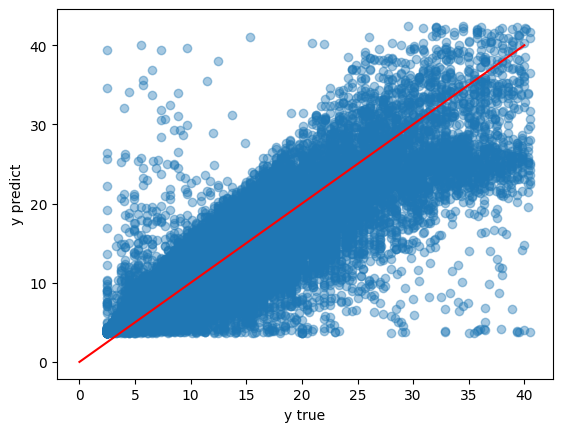

In [52]:
plt.scatter(y_test, y_pred1, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [53]:
y_pred2 = lr2.predict(x_test)

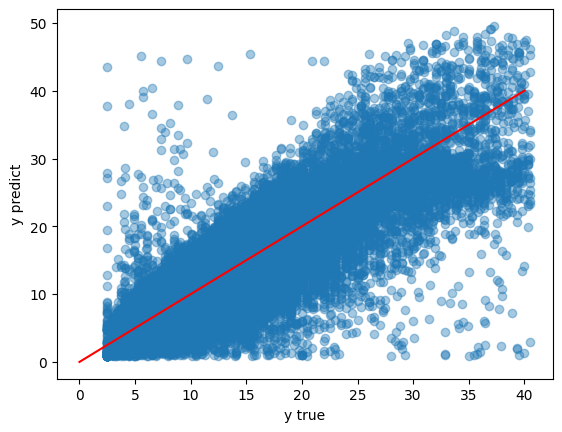

In [54]:
plt.scatter(y_test, y_pred2, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [55]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


In [56]:
max_error(y_true=y_test, y_pred=y_pred1)

np.float64(36.89123668762635)

In [57]:
max_error(y_true=y_test, y_pred=y_pred2)


np.float64(40.9520009754468)

In [58]:
mean_absolute_error(y_true=y_test, y_pred=y_pred1)

np.float64(1.9937047828695849)

In [59]:
mean_absolute_error(y_true=y_test, y_pred=y_pred2)


np.float64(2.4733856654205)

In [60]:
mean_squared_error(y_true=y_test, y_pred=y_pred1)

np.float64(9.48996920541345)

In [61]:
mean_squared_error(y_true=y_test, y_pred=y_pred2)


np.float64(12.74982319365087)

In [62]:
root_mean_squared_error(y_true=y_test, y_pred=y_pred1)

np.float64(3.0805793619729145)

In [63]:
root_mean_squared_error(y_true=y_test, y_pred=y_pred2)


np.float64(3.5706894563446525)

In [64]:
r2_score(y_true=y_test, y_pred=y_pred1)


0.7678497154593608

In [65]:
r2_score(y_true=y_test, y_pred=y_pred2)


0.6881048801970334

# Polynomial Features

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
x_train

array([[3.88492047, 1.        ],
       [1.13238243, 1.        ],
       [1.96839247, 1.        ],
       ...,
       [2.85291303, 2.        ],
       [5.59500234, 1.        ],
       [0.31716545, 1.        ]])

In [68]:
df

,distance,n_passenger,fare
0,1.681111,1,7.5
1,2.454363,1,7.7
2,5.039603,1,12.9
3,1.661442,3,5.3
4,4.483730,5,16.0
...,...,...,...
187591,0.112128,1,3.0
187592,1.879635,1,7.5
187593,12.867916,2,30.9
187594,3.536552,1,14.5


In [94]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)

In [95]:
x_train_pf.shape

(121937, 6)

In [96]:
lr_pf = LinearRegression(fit_intercept=False)
lr_pf.fit(x_train_pf, y_train)

LinearRegression(fit_intercept=False)

In [97]:
lr_pf.coef_

array([ 3.41382855,  2.3868179 , -0.05069976, -0.01951062,  0.00595216,
        0.01241676])

In [98]:
pf = PolynomialFeatures(degree=2)
x_test_pf = pf.fit_transform(x_test)

In [99]:
y_prsd_pf = lr_pf.predict(x_test_pf)

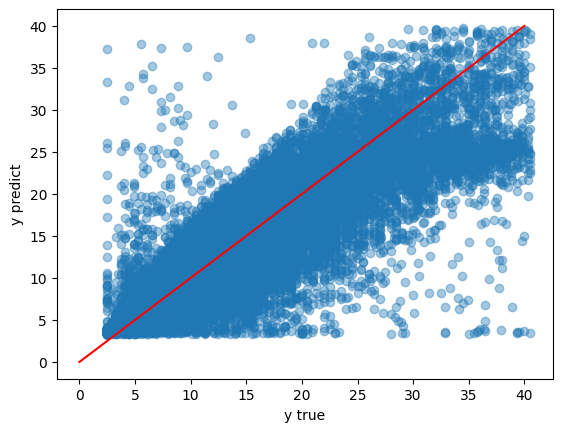

In [100]:
plt.scatter(y_test, y_prsd_pf, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [101]:
from sklearn.pipeline import Pipeline

In [140]:
steps = [('poly_feature', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression(fit_intercept=False))]

model = Pipeline(steps=steps)
model.fit(x_train, y_train)

Pipeline(steps=[('poly_feature', PolynomialFeatures()),
                ('lr', LinearRegression(fit_intercept=False))])

In [141]:
model['lr'].coef_

array([ 3.41382855,  2.3868179 , -0.05069976, -0.01951062,  0.00595216,
        0.01241676])

In [142]:
y_pred = model.predict(x_test)

In [143]:
y_pred

array([10.73874691,  9.03509592, 10.34325439, ..., 11.72827315,
        8.75404379,  5.45888116])

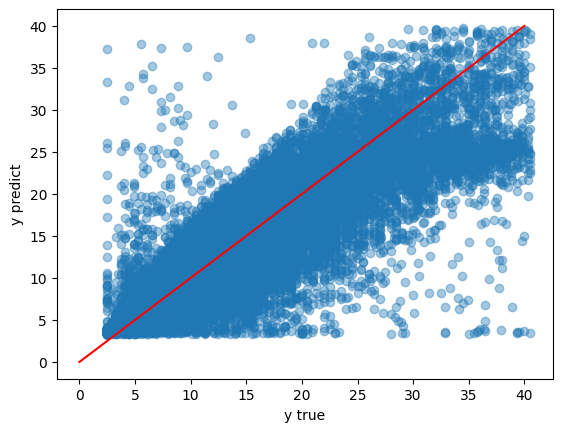

In [144]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [145]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

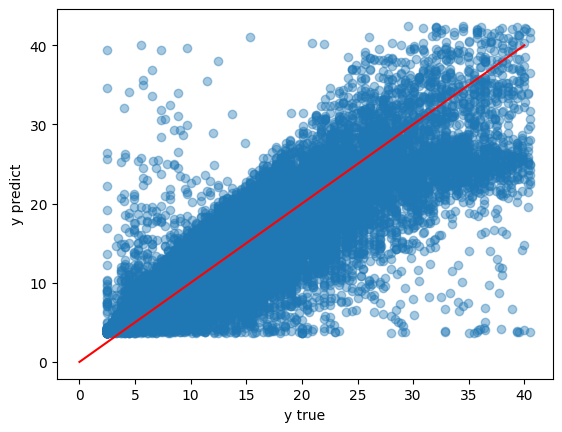

In [154]:
steps = [('poly_feature', PolynomialFeatures(degree=1)),
         ('lr', Ridge(alpha=100, fit_intercept=False))]

lr_ridge = Pipeline(steps=steps)
lr_ridge.fit(x_train, y_train)

y_pred = lr_ridge.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [155]:
lr_ridge['lr'].coef_

array([3.63928769, 2.18418153, 0.04423921])

c:\Users\MBAhmadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+06, tolerance: 1.742e+03
  model = cd_fast.enet_coordinate_descent(


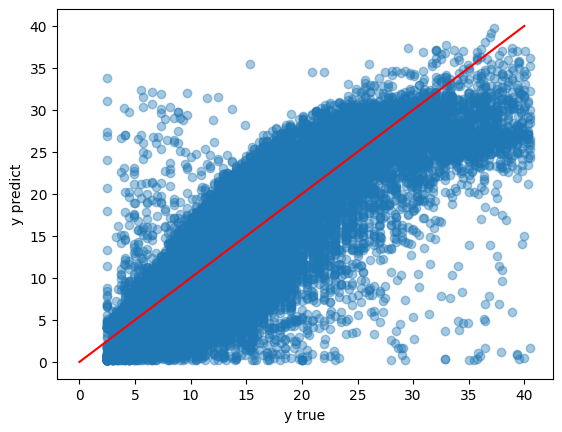

In [ ]:
steps = [('poly_feature', PolynomialFeatures(degree=5)),
         ('lr', Lasso(alpha=2, fit_intercept=False))]

lr_ridge = Pipeline(steps=steps)
lr_ridge.fit(x_train, y_train)

y_pred = lr_ridge.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');

In [193]:
lr_ridge['lr'].coef_

array([ 0.00000000e+00,  2.32264519e+00,  0.00000000e+00,  2.04812158e-01,
        0.00000000e+00,  1.77189255e-01, -1.38691722e-02,  0.00000000e+00,
        0.00000000e+00,  4.90937051e-03, -6.46235871e-04, -1.68309873e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.51263129e-05,
        1.31089139e-05,  3.17027500e-04,  0.00000000e+00, -8.38778460e-04,
       -3.29914024e-04])

c:\Users\MBAhmadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+06, tolerance: 1.742e+03
  model = cd_fast.enet_coordinate_descent(


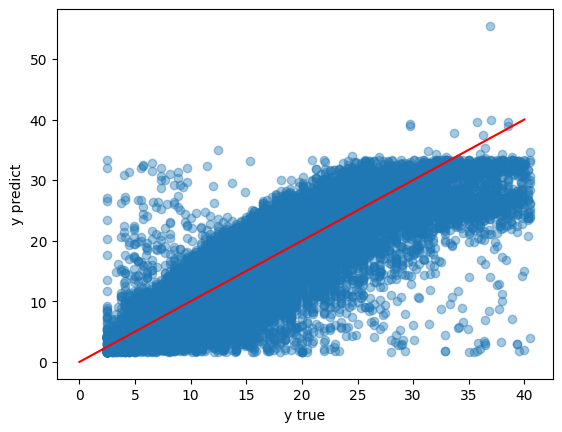

In [197]:
steps = [('poly_feature', PolynomialFeatures(degree=20)),
         ('lr', ElasticNet(alpha=1, l1_ratio=0.5, fit_intercept=False))]

lr_ridge = Pipeline(steps=steps)
lr_ridge.fit(x_train, y_train)

y_pred = lr_ridge.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(np.linspace(0, 40, 100),
         np.linspace(0, 40, 100),
         c = 'red')
plt.xlabel('y true')
plt.ylabel('y predict');